In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
#pip install scikit-learn==1.0.2

In [5]:
# Importing csv  

kc_house_data = pd.read_csv('kc_house_data.csv')
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#Checking for Datatypes
kc_house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
#Converting the 'price' from float to int

kc_house_data = kc_house_data.astype({"price": int})
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#Finding Min/Max of price 
kc_house_data.min()

id                       1000102
date             20140502T000000
price                      75000
bedrooms                       0
bathrooms                    0.0
sqft_living                  290
sqft_lot                     520
floors                       1.0
waterfront                     0
view                           0
condition                      1
grade                          1
sqft_above                   290
sqft_basement                  0
yr_built                    1900
yr_renovated                   0
zipcode                    98001
lat                      47.1559
long                    -122.519
sqft_living15                399
sqft_lot15                   651
dtype: object

C:\Users\tmam9\Anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


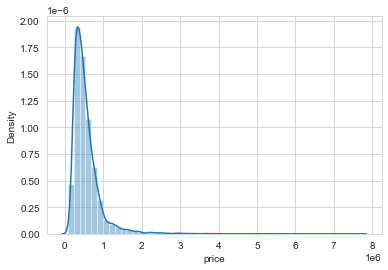

In [9]:
x = kc_house_data.price
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()


C:\Users\tmam9\Anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


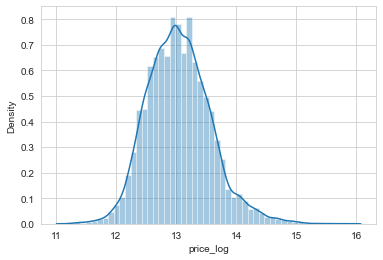

In [10]:
kc_house_data['price_log'] = np.log(kc_house_data.price)
x = kc_house_data.price_log
sns.distplot(x)
plt.show()

In [11]:
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,12.793859
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,12.899220
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,12.904459
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,12.899220


<AxesSubplot:>

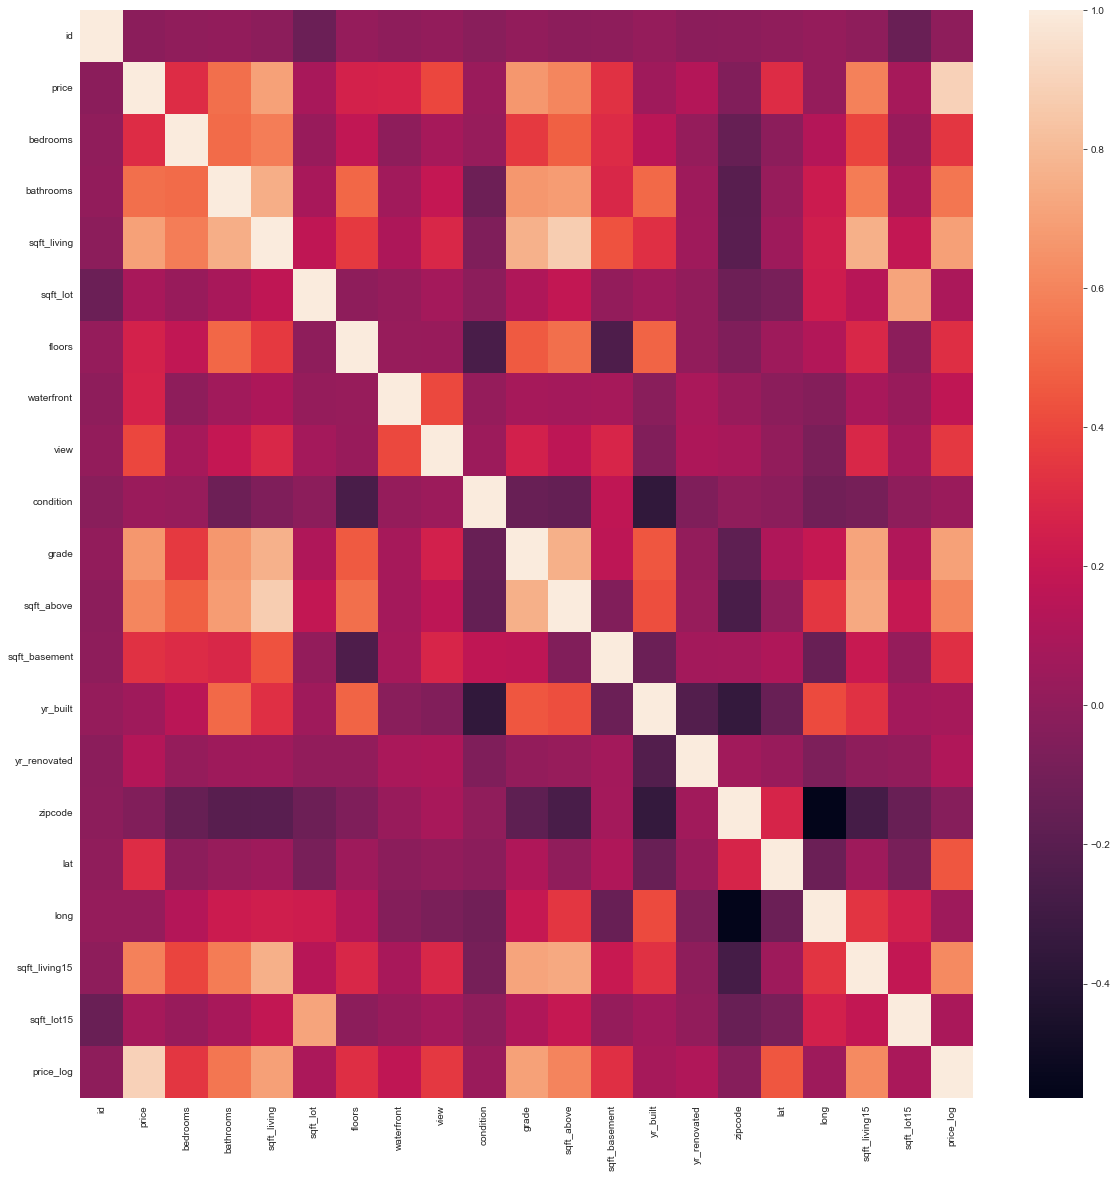

In [12]:
#explore the correlations in our data set 
#the lighter the square the stronger the coorelation. 
plt.figure(figsize=(20,20))
sns.heatmap(kc_house_data.corr())

In [37]:
small_corr = kc_house_data.corr().drop(columns=["zipcode", "sqft_living15", "sqft_lot15"])

<AxesSubplot:>

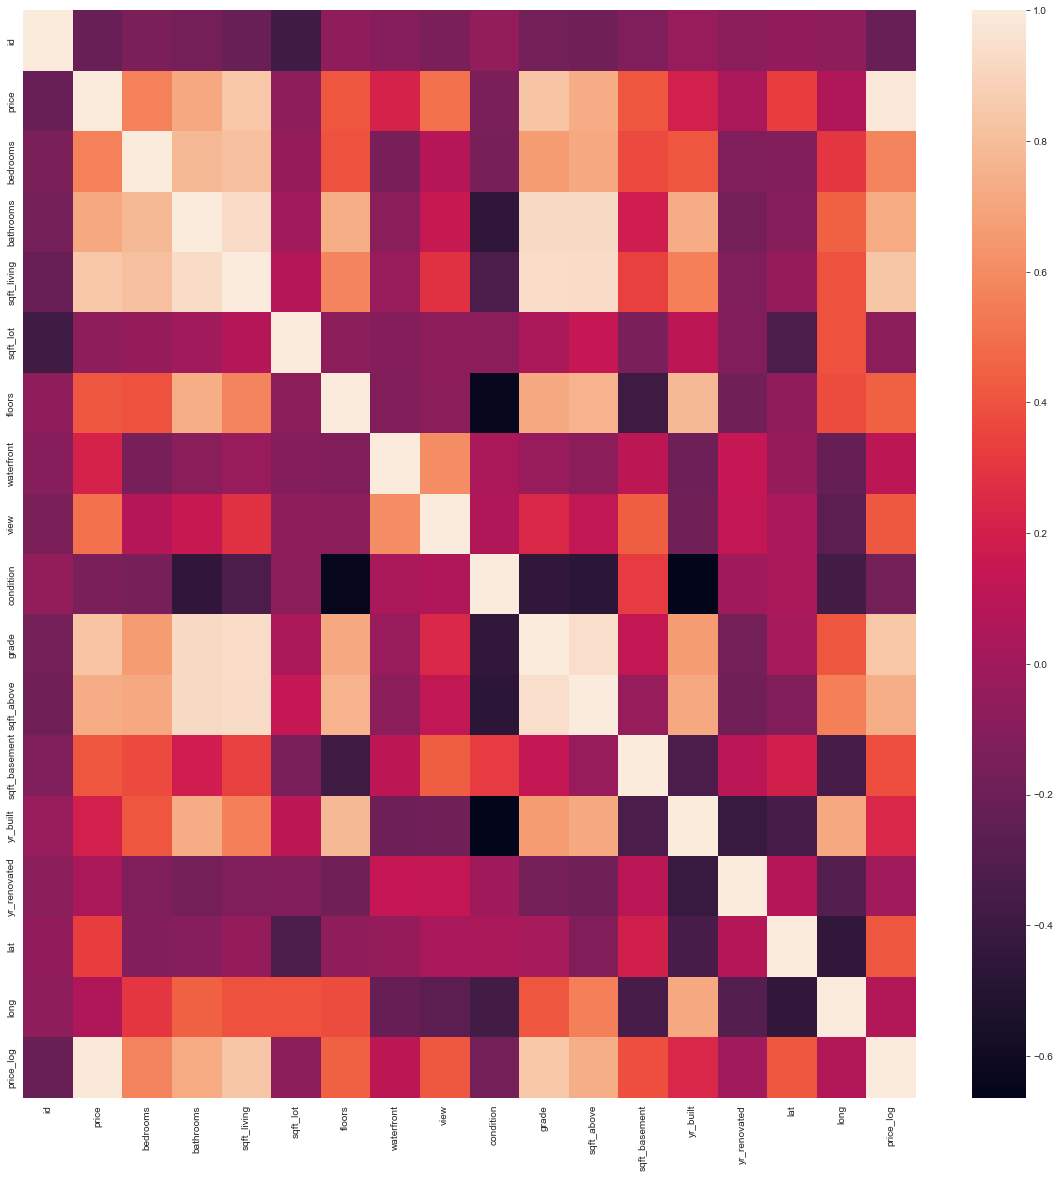

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(small_corr.corr())

In [13]:
cleaned_house_data = kc_house_data.drop(['id', 'date', 'waterfront', 'view', 'sqft_living15', 'sqft_lot15'], axis=1)
cleaned_house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price_log
0,221900,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,12.309982
1,538000,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,13.195614
2,180000,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,12.100712
3,604000,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,13.311329
4,510000,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,13.142166


In [14]:
#cleaned_house_data.to_csv("cleaned_house_data.csv", index=False)

In [15]:
columns = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "condition", "grade", "sqft_above", "sqft_basement",
           "yr_built", "yr_renovated", "zipcode", "lat", "long"]
target = ["price"]


In [16]:
# Create our features
X = cleaned_house_data.drop(columns='price')
# Create our target
#y = cleaned_house_data.loc[:, target].copy()
y = cleaned_house_data['price']

In [17]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price_log
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,13.047886
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,0.526822
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,11.225243
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,12.682152
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,13.017003
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,13.377006
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,15.856731


In [18]:
y.value_counts()

450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
278800      1
439888      1
354901      1
942000      1
402101      1
Name: price, Length: 3625, dtype: int64

In [19]:
#pip install imbalanced-learn==0.9.0

In [20]:
#pip install scikit-learn==1.0.2


In [21]:
X = StandardScaler().fit_transform(X)
print(X[0:5])

[[-0.39873715 -1.44746357 -0.97983502 -0.22832133 -0.915427   -0.62918687
  -0.55883575 -0.73470764 -0.65868104 -0.54489777 -0.21012839  1.87015159
  -0.35257175 -0.30607896 -1.40070277]
 [-0.39873715  0.1756067   0.53363434 -0.18988538  0.93650577 -0.62918687
  -0.55883575  0.46084084  0.2451414  -0.6810785   4.7466776   0.87956753
   1.16156823 -0.74634143  0.2804195 ]
 [-1.47395936 -1.44746357 -1.42625404 -0.12329847 -0.915427   -0.62918687
  -1.40958711 -1.22983377 -0.65868104 -1.29389179 -0.21012839 -0.9333882
   1.28353661 -0.13565477 -1.79794286]
 [ 0.67648506  1.14944885 -0.13055006 -0.2440144  -0.915427    2.44429394
  -0.55883575 -0.89169885  1.39751501 -0.20444594 -0.21012839  1.08516045
  -0.28328794 -1.271816    0.50007303]
 [-0.39873715 -0.14900736 -0.43542158 -0.16965339 -0.915427   -0.62918687
   0.29191561 -0.13089528 -0.65868104  0.54454807 -0.21012839 -0.073636
   0.40955019  1.19933466  0.17896384]]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
model.score(X_train, y_train)

0.8389836640538606

In [25]:
model.score(X_test, y_test)

0.7914611823724139

In [26]:
new_kc_data = cleaned_house_data.drop(["sqft_lot", "floors", "condition", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat","long"], axis=1)

In [27]:
new_kc_data.head()

,price,bedrooms,bathrooms,sqft_living,grade,sqft_above,price_log
0,221900,3,1.00,1180,7,1180,12.309982
1,538000,3,2.25,2570,7,2170,13.195614
2,180000,2,1.00,770,6,770,12.100712
3,604000,4,3.00,1960,7,1050,13.311329
4,510000,3,2.00,1680,8,1680,13.142166


In [28]:
X = new_kc_data.drop(columns=['price', 'price_log'])
y = new_kc_data['price_log']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
model.score(X_train, y_train)

0.5599078151672097

In [32]:
model.score(X_test, y_test)

0.5812224000516948